In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

In [6]:
class SVM:
    def __init__(self):  # Constructor
        self.weights = None
        self.bias = 0
    
    def init_gradients(self, features):
        samples_count, features_count = features.shape
        gradient_weights = np.zeros(features_count)
        gradient_bias = 0
        return samples_count, features_count, gradient_weights, gradient_bias
    
    def compute_loss(self, weights, bias, features, labels, reg_strength):
        hinge_loss = 0
        # Regularization term (L2 norm)
        regularization_term = 0.5 * reg_strength * np.dot(weights, weights)
        
        for i in range(len(labels)):
            margin = labels[i] * (np.dot(weights, features[i]) + bias)
            hinge_loss += max(0, 1 - margin)  # Hinge loss calculation

        # Total loss is average hinge loss + regularization
        total_loss = regularization_term + hinge_loss / len(labels)
        return total_loss

    def gradient_descent(self, X, Y, batch_size, lr, reg_strength):
        num_samples, num_features, gradient_w, gradient_b = self.init_gradients(X)
        sample_indices = np.arange(num_samples)
        np.random.shuffle(sample_indices)
        
        for start_idx in range(0, num_samples, batch_size):
            grad_w_batch = np.zeros(num_features)
            grad_b_batch = 0

            for j in range(start_idx, min(start_idx + batch_size, num_samples)):
                x_sample = X[sample_indices[j]]
                y_sample = Y[sample_indices[j]]
                
                margin = y_sample * (np.dot(self.weights, x_sample) + self.bias)
                
                if margin < 1:  # Hinge loss condition
                    grad_w_batch += -y_sample * x_sample
                    grad_b_batch += -y_sample

            gradient_w += grad_w_batch / batch_size
            gradient_b += grad_b_batch / batch_size
        
        # Updating the weights and bias
        self.weights -= lr * (reg_strength * self.weights + gradient_w)
        self.bias -= lr * gradient_b

    def fit(self, X, Y, batch_size=100, lr=0.01, epochs=1000, reg_strength=0.01):
        _, features_count, _, _ = self.init_gradients(X)
        self.weights = np.zeros(features_count)
        self.bias = 0
        all_losses = []
        for epoch in range(epochs):
            self.gradient_descent(X, Y, batch_size, lr, reg_strength)
            loss = self.compute_loss(self.weights, self.bias, X, Y, reg_strength)
            all_losses.append(loss)
            if epoch % 100 == 0:  # Output loss every 100 epochs
                print(f"Epoch {epoch}: Loss = {loss}")
        return self.weights, self.bias, all_losses
    
    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

    def compute_accuracy(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def plot_data_and_boundary(self, X_train, y_train, weights, bias):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, marker='o', s=25)
        grid_x, grid_y = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10),
                                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10))
        grid_z = -(weights[0] * grid_x + weights[1] * grid_y + bias) / weights[2]
        ax.plot_surface(grid_x, grid_y, grid_z, color='yellow', alpha=0.5)
        plt.show()

    def plot_loss_curve(self, losses):
        plt.plot(losses)
        plt.title("Hinge Loss over Time")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()


In [7]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=500, n_features=3, n_informative=3, n_redundant=0, 
                           n_clusters_per_class=1, flip_y=0.1, class_sep=1.0, random_state=40)

# Relabel the targets to +1 and -1
y = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
svm = SVM()
weights, bias, losses = svm.fit(X_train, y_train, batch_size=100, lr=0.01, epochs=1000, reg_strength=0.01)

# Prediction and Accuracy
train_accuracy = svm.compute_accuracy(X_train, y_train)
test_accuracy = svm.compute_accuracy(X_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Epoch 0: Loss = 0.928142975851565
Epoch 100: Loss = 0.32660850373415595
Epoch 200: Loss = 0.31894452603488604
Epoch 300: Loss = 0.31627314361352704
Epoch 400: Loss = 0.3151185442080502
Epoch 500: Loss = 0.3146879587499239
Epoch 600: Loss = 0.31434206747199833
Epoch 700: Loss = 0.3140042989184549
Epoch 800: Loss = 0.3138184738844658
Epoch 900: Loss = 0.3137740698226216
Training Accuracy: 89.00%
Testing Accuracy: 88.00%


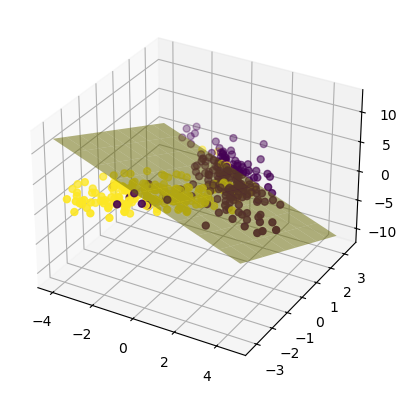

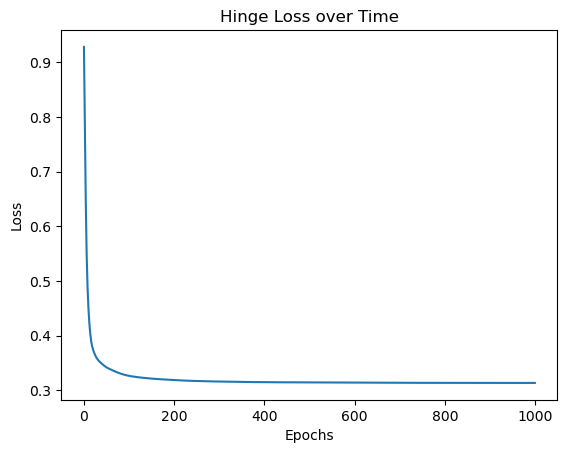

In [8]:
# Visualize decision boundary and loss
svm.plot_data_and_boundary(X_train, y_train, weights, bias)
svm.plot_loss_curve(losses)